# Project: Wrangling and Analyze Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import requests
import re
import tweepy
%matplotlib inline

ModuleNotFoundError: No module named 'tweepy'

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [166]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [167]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [168]:
# Request tsv file from the url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Write the response into tsv file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Load data from twitter_archive_enhanced.csv into the dataframe
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [169]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [170]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991:

Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265: 667538891197542400
Fail
2266:

In [171]:
tweet_json = tweet_json[['tweet_id','retweet_count','favorite_count']]
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

#### Twitter Archive

In [172]:
# assessing the twitter archive dataset
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [173]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [174]:
archive.duplicated().sum()

0

In [175]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [176]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [177]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
an              7
Bailey          7
Daisy           7
Buddy           7
Toby            7
Oscar           6
Koda            6
Milo            6
Leo             6
Dave            6
Rusty           6
Jack            6
Stanley         6
Jax             6
Bella           6
Scout           6
Gus             5
             ... 
Joshwa          1
Champ           1
Marty           1
officially      1
Lucia           1
Dobby           1
Einstein        1
Murphy          1
Scruffers       1
Jeremy          1
Tycho           1
Tedders         1
Monkey          1
Doobert         1
Jazzy           1
Jo              1
Ralf            1
Bonaparte       1
Bode            1
Enchilada       1
Kayla           1
incredibly      1
Aiden           1
Gert            1
Samsom    

#### Image Predictions

In [178]:
# assessing the image predictions dataset
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [179]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [180]:
predictions.duplicated().sum()

0

In [181]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [182]:
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### Twitter API

In [183]:
# assessing the twitter API
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [184]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [185]:
tweet_json.duplicated().sum()

0

In [186]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [187]:
tweet_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
1. In the archive dataset, the tweet_id column is of type int instead of string

2. In the predictions dataset, the tweet_id column is of type int instead of string

3. In the twitter API dataset, the tweet_id column is also of type int instead of str

4. In the archive dataset, the timestamp column is of type str instead of timestamp

5. In the archive dataset, the expanded_urls column have more than one value separated by a comma

6. In the predictions dataset, the names in the p1, p2, p3 columns have no standard. Some are written in lowercase while others are in uppercase

7. So many missing values in the archive dataset (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls)

8. In the archive dataset, there are invalid and non-standard names like an, a, quite,such, the etc

9. Using of '_'  in the p1, p2 and p3 columns of the predictions dataset

### Tidiness issues
1. In the archive dataset, there are HTML tags, URL, and content in a single column.

2. The last columns of the archive dataset can be merged to one

## Cleaning Data

In [188]:
# Make copies of original pieces of data
archive_copy = archive.copy()
predictions_copy = predictions.copy()
tweet_json_copy = tweet_json.copy()

### Issue #1:

#### Define:
Delete all the rows with retweet(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Code

In [189]:
# deleting all rows with retweet in it
archive_copy = archive_copy[archive_copy.in_reply_to_status_id.isnull()]
archive_copy = archive_copy[archive_copy.in_reply_to_user_id.isnull()]
archive_copy = archive_copy[archive_copy.retweeted_status_id.isnull()]
archive_copy = archive_copy[archive_copy.retweeted_status_user_id.isnull()]
archive_copy = archive_copy[archive_copy.retweeted_status_timestamp.isnull()]

#### Test

In [190]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #2:

#### Define
Delete unnecessary columns in the archive dataset (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Code

In [191]:
# deleting by dropping columns
archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
           'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True, axis=1)

#### Test

In [192]:
# checking column names
archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3:

#### Define
Convert the tweet_id datatype in the three datasets; archive_copy, predictions_copy and tweet_json_copy, to str

#### Code

In [193]:
# Convert datatype of tweet_id in archive_copy
archive_copy.tweet_id = archive_copy.tweet_id.astype(str)

# Convert datatype of tweet_id in predictions_copy
predictions_copy.tweet_id = predictions_copy.tweet_id.astype(str)

# Convert datatype of tweet_id in tweet_json_copy
tweet_json_copy.tweet_id = tweet_json_copy.tweet_id.astype(str)

#### Test

In [194]:
# check if tweet_id is str in archive_copy
print(archive_copy['tweet_id'].dtypes)

object


In [195]:
# check if tweet_id is str in predictions_copy
print(predictions_copy['tweet_id'].dtypes)

object


In [196]:
# check if tweet_id is str in tweet_json_copy
print(tweet_json_copy['tweet_id'].dtypes)

object


### Issue #4:

#### Define
Convert the timestamp datatype in the archive_copy dataset to timestamp

#### Code

In [197]:
# Convert datatype of timestamp in archive_copy to timestamp
archive_copy.timestamp = pd.to_datetime(archive_copy.timestamp)

#### Test

In [198]:
# check if timestamp is timestamp in archive_copy
print(archive_copy['timestamp'].dtypes)

datetime64[ns]


### Issue #5:

#### Define
Convert all dog names in the p1, p2, p3 columns of the predictions_copy dataset to lowercase

#### Code

In [199]:
#converting p1 to lowercase
predictions_copy.p1 = predictions_copy.p1.str.lower()

# converting p2 to lower
predictions_copy.p2 = predictions_copy.p2.str.lower()

#converting p3 to lower
predictions_copy.p3 = predictions_copy.p3.str.lower()

#### Test

In [200]:
# check p1 to see if it's all in lowercases
predictions_copy.p1

0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        ch

In [201]:
# checking p2 to see if it's all in lowercases
predictions_copy.p2

0                         collie
1             miniature_pinscher
2                       malinois
3                        redbone
4                     rottweiler
5               english_springer
6                     mud_turtle
7                tibetan_mastiff
8                shopping_basket
9                       komondor
10               tibetan_mastiff
11             yorkshire_terrier
12              english_foxhound
13                  bull_mastiff
14               german_shepherd
15                      shih-tzu
16                  newfoundland
17                          cock
18                          desk
19                   toy_terrier
20                    toy_poodle
21                         otter
22                  newfoundland
23      chesapeake_bay_retriever
24                siberian_husky
25                         skunk
26                  afghan_hound
27                   toy_terrier
28                    bloodhound
29                    barracouta
          

In [202]:
# checking p3 to see if it's all in lowercases
predictions_copy.p3

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
5        greater_swiss_mountain_dog
6                          terrapin
7                          fur_coat
8                  golden_retriever
9       soft-coated_wheaten_terrier
10               labrador_retriever
11                         pekinese
12                     ibizan_hound
13                   french_bulldog
14                         malinois
15                   dandie_dinmont
16                           borzoi
17                        partridge
18                         bookcase
19                          basenji
20                 miniature_poodle
21                   great_grey_owl
22                      groenendael
23               labrador_retriever
24                       eskimo_dog
25                          hamster
26                           briard
27                         p

### Issue #6:

#### Define
Replace all invalid names in the archive dataset with NaN. From the given dataset, all names with lowercases are invalid

#### Code

In [203]:
list_names = archive_copy.name.apply(lambda x: re.findall(r'\b[a-z]\w+', x))

In [204]:
names =[]
for name in list_names :
    if name :
        if name not in names :
            names.append(name)

In [205]:
names

[['such'],
 ['quite'],
 ['not'],
 ['one'],
 ['incredibly'],
 ['very'],
 ['my'],
 ['his'],
 ['an'],
 ['actually'],
 ['just'],
 ['getting'],
 ['mad'],
 ['this'],
 ['unacceptable'],
 ['all'],
 ['old'],
 ['infuriating'],
 ['the'],
 ['by'],
 ['officially'],
 ['life'],
 ['light'],
 ['space']]

In [206]:
invalid = ['such', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space', 'a', 'None']

In [207]:
for i in invalid:
    archive_copy.loc[archive_copy.name == i, 'name'] = None

#### Test

In [208]:
# check if the invalid names are still in the name column
archive_copy.name.value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Lola         8
Winston      8
Sadie        8
Daisy        7
Toby         7
Bella        6
Bailey       6
Jax          6
Stanley      6
Oscar        6
Koda         6
Bo           6
Louis        5
Bentley      5
Dave         5
Rusty        5
Chester      5
Leo          5
Milo         5
Scout        5
Buddy        5
Clark        4
Bear         4
Finn         4
            ..
Einstein     1
Stephan      1
Beebop       1
Dobby        1
Charl        1
Jazzy        1
Doobert      1
Monkey       1
Jareld       1
Ralphy       1
Orion        1
Sephie       1
Eve          1
Newt         1
Luther       1
Trip         1
Hermione     1
Jerome       1
Ken          1
Bloo         1
Jeffrie      1
Wishes       1
Carbon       1
Loomis       1
Huck         1
Paull        1
Murphy       1
Jeremy       1
Tycho        1
Eazy         1
Name: name, Length: 929, dtype: int64

### Issue #7:

#### Define
Remove the '-' from the p1 and p2 columns in the predictions_copy dataset and make them lowercases

#### Code

In [209]:
#p1
# remove '-' from the dog names and make them lowercase
predictions_copy.p1 = predictions_copy.p1.str.replace("_", " ")
predictions_copy.p1 = predictions_copy.p1.str.lower()

In [210]:
#p2
# remove '-' from the dog names and make them lowercase
predictions_copy.p2 = predictions_copy.p2.str.replace("_", " ")
predictions_copy.p2 = predictions_copy.p2.str.lower()

In [211]:
#p3
# remove '-' from the dog names and make them lowercase
predictions_copy.p3 = predictions_copy.p3.str.replace("_", " ")
predictions_copy.p3 = predictions_copy.p3.str.lower()

#### Test

In [212]:
# check to see result
predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese mountain dog,0.651137,True,english springer,0.263788,True,greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


### Issue #8:

#### Define
Remove 'href=' tags in the source column of the archive_copy dataset and extract the source text

#### Code

In [213]:
# removing 'href=' tags and extracting the source text
archive_copy.source = archive_copy.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

#### Test

In [214]:
archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #9:

#### Define
Merge the last 4 columns of the dataset(doggo, fluffer, pupper and poppo) into one column 'stage', for the dog stages

#### Code

In [215]:
archive_copy.doggo.replace('None', '', inplace=True)
archive_copy.floofer.replace('None', '', inplace=True)
archive_copy.pupper.replace('None', '', inplace=True)
archive_copy.puppo.replace('None', '', inplace=True)

# merge into column
archive_copy['stage'] = archive_copy.doggo + archive_copy.floofer + archive_copy.pupper + archive_copy.puppo

# handle multiple stages
archive_copy.loc[archive_copy.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archive_copy.loc[archive_copy.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archive_copy.loc[archive_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

# handle missing values
archive_copy.loc[archive_copy.stage == '', 'stage'] = np.nan

In [216]:
# remove the original columns since it's no longer needed using the drop () method
archive_copy.drop('doggo', inplace=True, axis=1)
archive_copy.drop('floofer', inplace=True, axis=1)
archive_copy.drop('pupper', inplace=True, axis=1)
archive_copy.drop('puppo', inplace=True, axis=1)

#### Test

In [217]:
archive_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Issue #10:

#### Define
Merge the three datasets; archive_copy, predictions_copy, tweet_json_copy into one

#### Code

In [218]:
# first merge the archive_copy and predictions_copy dataset
df = pd.merge(archive_copy, predictions_copy, how='inner', on=['tweet_id'])

# now merge df and tweet_json_copy
df = pd.merge(df, tweet_json_copy, how='inner', on=['tweet_id'])

#### Test

In [219]:
# checking to see if all three datasets has been merged
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-n

### Issue #11:

#### Define
Find the average ratings by dividing rating_numerator by rating_denominator and add a new column 'ratings' to the dataset

#### Code

In [220]:
# dividing the numerator by denominator
df['ratings'] = df['rating_numerator'] / df['rating_denominator']

#### Test

In [221]:
# check to see if 'ratings' has been added to the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-n

### Issue #12:

#### Define
* Get the expanded_urls value from Twitter API
* If more than one url in expanded urls and they are the same, remove the others keeping only one url

#### Code

In [222]:
# Check if there are any null values
df.expanded_urls.isnull().sum()

0

In [223]:
# since there are no null values in the expanded_urls, check to see if any row has more than one url
df.expanded_urls.apply(lambda x : len(x.split(','))).value_counts()

1    1466
2     282
3     110
4     105
5       8
Name: expanded_urls, dtype: int64

In [224]:
# create empty list to append
url = []

# Function to remove the additional url for rows having more than one url, if they are same
def remove_url(row):
    # split the url 
    split_url = row.expanded_urls.split(',')
    # set returns uniques elements
    url_set = set(split_url)
    # Convert set into comma separated string
    url_str = ",".join(url_set)
    # append the url str
    url.append(url_str)
            
        
# call function using pandas apply by columns
df.apply(remove_url, axis=1)

# add lists created to master dataframe
df.expanded_urls = url

#### Test

In [225]:
# Check again
df.expanded_urls.apply(lambda x : len(x.split(','))).value_counts()

1    1943
2      28
Name: expanded_urls, dtype: int64

In [226]:
# Manual Checking of those 28 rows
df[df.expanded_urls.apply(lambda x : len(x.split(','))) == 2][['tweet_id','expanded_urls']]

,tweet_id,expanded_urls
6,890971913173991426,https://twitter.com/dog_rates/status/890971913...
26,886736880519319552,https://twitter.com/dog_rates/status/886736880...
63,878281511006478336,https://twitter.com/dog_rates/status/878281511...
80,873213775632977920,https://twitter.com/dog_rates/status/873213775...
92,870656317836468226,https://twitter.com/dog_rates/status/870656317...
102,868552278524837888,https://twitter.com/dog_rates/status/868552278...
119,863062471531167744,"https://www.gofundme.com/helpquinny,https://tw..."
127,860563773140209665,https://twitter.com/dog_rates/status/860563773...
141,857393404942143489,https://www.gofundme.com/meeko-needs-heart-sur...
156,852912242202992640,"https://www.gofundme.com/bennys-medical-bills,..."


## Storing Data

In [227]:
df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-n

In [229]:
df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,ratings
count,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000,1971.000000
mean,12.223237,10.477423,1.201928,0.594558,1.345850e-01,6.016556e-02,2784.449518,8949.106545,1.169499
std,41.634034,6.853275,0.559020,0.272126,1.010527e-01,5.094156e-02,4697.662893,12267.799790,4.090634
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000,0.000000
25%,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,628.500000,1997.000000,1.000000
50%,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1367.000000,4147.000000,1.100000
75%,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,3239.000000,11402.500000,1.200000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000,177.600000


### Insights:
1. What stage of dog has the highest number?

2. What are the most common dog names?

3. What is the correlation between retweet_count and favorite_count?

4. What is the correlation between retweet_count and ratings?

5. What is the correlation between favorite_counts and ratings?

6. What is the correlation between ratings, retweet_count and favorite_counts?

7. What did most people use in visiting the WeRateDags page on twitter?

### Visualization

In [230]:
# type of dog with the highest number.
df.stage.value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

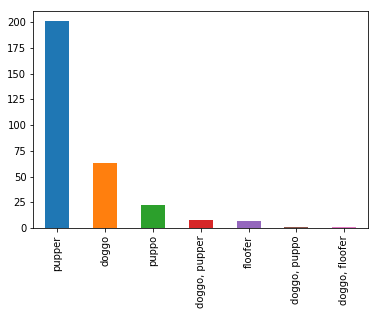

In [231]:
# a bar chart of dog type in their different stages
df.stage.value_counts().plot.bar();

The number of dogs in puppo is 201, making it the highest number of dogs in this stage

In [232]:
# most common dog names
df.name.value_counts()

Charlie      11
Lucy         10
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          7
Toby          7
Daisy         7
Koda          6
Bella         6
Bo            6
Jax           6
Stanley       6
Rusty         5
Dave          5
Chester       5
Leo           5
Bailey        5
Oscar         5
Milo          5
Louis         5
Scout         5
Buddy         5
Maggie        4
Oakley        4
Larry         4
Jerry         4
             ..
Milky         1
Enchilada     1
Einstein      1
Stephan       1
Beebop        1
Doobert       1
Bloo          1
Banjo         1
Jerome        1
Staniel       1
Orion         1
Sephie        1
Eve           1
Newt          1
Luther        1
Trip          1
Fred          1
Hermione      1
Jareld        1
Tycho         1
Ken           1
Jeffrie       1
Wishes        1
Carbon        1
Loomis        1
Huck          1
Paull         1
Murphy        1
Jeremy        1
Eazy          1
Name: name, Length: 912,

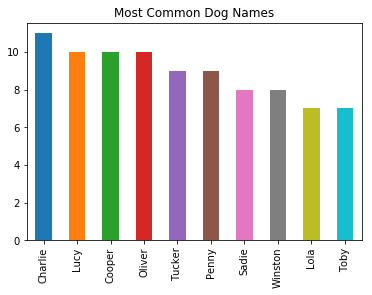

In [233]:
# 10 most common dog names (just a few out of the 912 names)
df.name.value_counts()[:10].plot.bar(title='Most Common Dog Names');

Charlie, Oliver, Lucy, Cooper, Tucker, Penny, Winston, Sadie, Toby and Daisy are the 10 most common dog names with Charlies being the highest.

In [245]:
# Correlation between retweet_count and favorite_count
cor_rel = df[['retweet_count','favorite_count']].corr()
cor_rel

,retweet_count,favorite_count
retweet_count,1.000000,0.913014
favorite_count,0.913014,1.000000


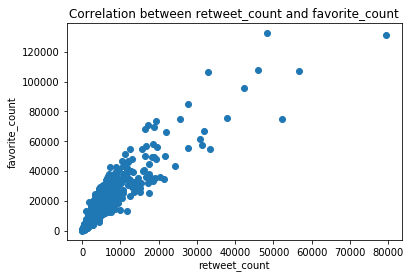

In [251]:
# a scatterplot of the correlation between retweet_count and favorite_count
plt.scatter(x = df.retweet_count,y = df.favorite_count)
plt.title('Correlation between retweet_count and favorite_count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()

The correlation coefficient beteen retweet_count and favorite_count is 0.913014, which is close to 1 and positive demonstrating a strong positive correlation bewteen the two metrics. Hence, the retweet_count and favorite_count are highly positively correlated

In [236]:
# Correlation between retweet_count and  ratings
cor_rel = df[['retweet_count', 'ratings']].corr()
cor_rel

,retweet_count,ratings
retweet_count,1.0000,0.0183
ratings,0.0183,1.0000


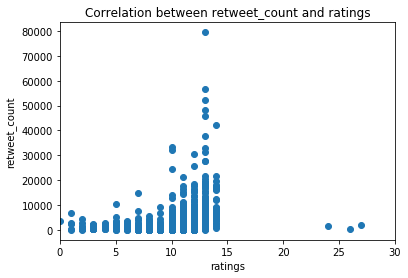

In [237]:
# correlation between retweet_count and rating
plt.scatter(y=df.retweet_count,x=df.rating_numerator )
plt.title('Correlation between retweet_count and ratings')
plt.ylabel('retweet_count')
plt.xlabel('ratings')
plt.xlim(0, 30)
plt.show()

The correlation coefficient between retweet_count and ratings is 0.018300, which is not closer to 1 but rather closer to 0 which shows a weak positive correlation bewteen the two metrics. Hence, the retweet_count and ratings are weakly positively correlated

In [238]:
# Correlation between ratings and favorite_count
cor_rel = df[['ratings', 'favorite_count']].corr()
cor_rel

,ratings,favorite_count
ratings,1.000000,0.015812
favorite_count,0.015812,1.000000


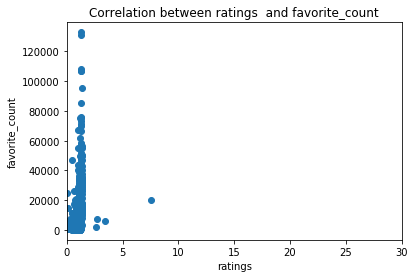

In [239]:
# correlation between ratings and favorite_count
plt.scatter(y=df.favorite_count,x=df.ratings)
plt.title('Correlation between ratings  and favorite_count')
plt.xlabel('ratings')
plt.ylabel('favorite_count')
plt.xlim(0, 30)
plt.show()

The correlation coefficient between ratings and favorite_count is 0.015812, which is not closer to 1 but rather closer to 0 which shows a weak positive correlation bewteen the two metrics. Hence, ratings and favorite_count are weakly positively correlated

In [240]:
# Correlation between ratings, retweet_count and favorite_count
cor_rel = df[['ratings','retweet_count','favorite_count']].corr()
cor_rel

,ratings,retweet_count,favorite_count
ratings,1.000000,0.018300,0.015812
retweet_count,0.018300,1.000000,0.913014
favorite_count,0.015812,0.913014,1.000000


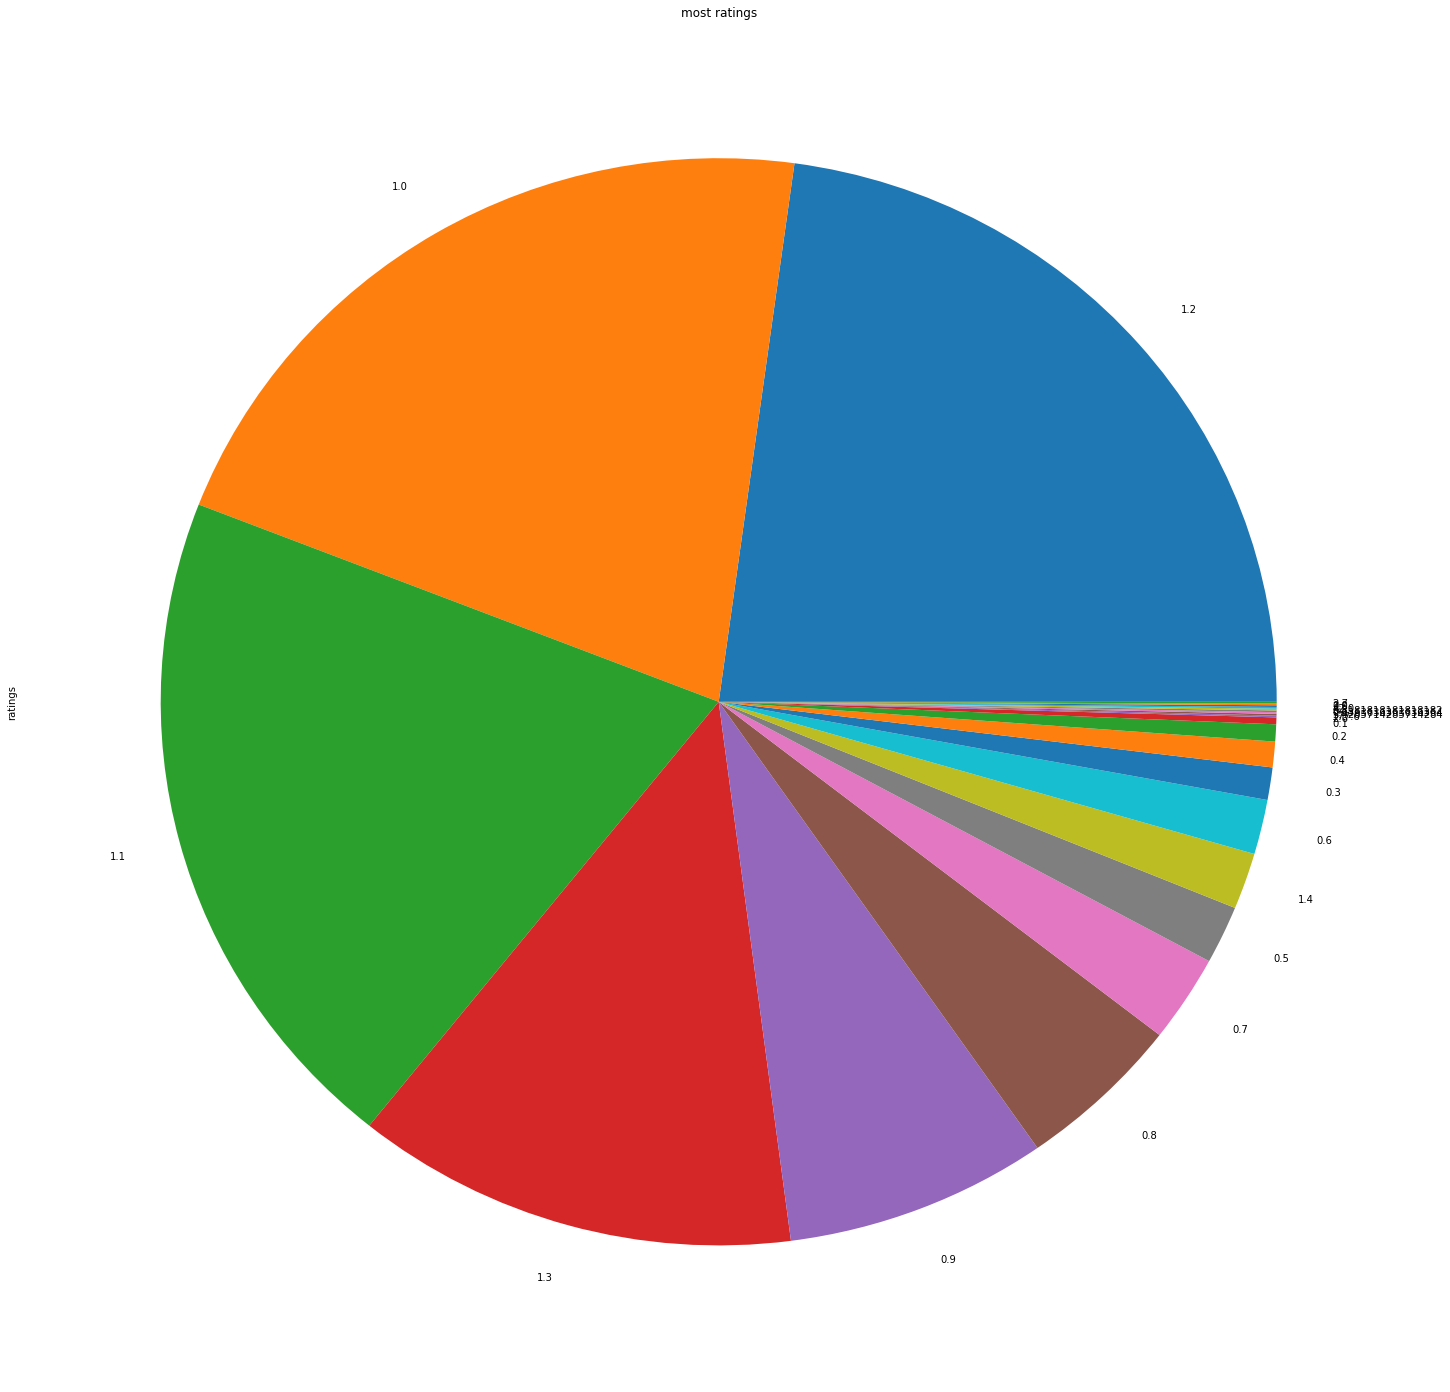

In [241]:
# a pie chart of the dog with the most ratings
df.ratings.value_counts().plot.pie(figsize=(25,25),title='most ratings');

In [242]:
# the different sources on which people visited the WeRateDogs page on twitter
df.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

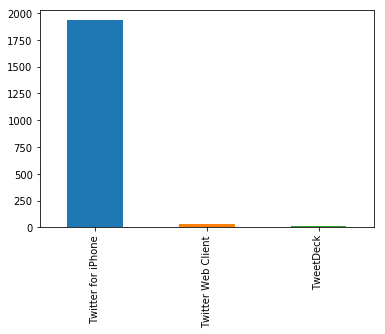

In [243]:
# a barchart of the highest ratings source
df.source.value_counts().plot.bar();

Most people visited the page using their iphones